巴特沃斯滤波器阶数和截止频率

低通巴特沃斯滤波器

In [1]:
import numpy as np
from scipy.signal import buttord, butter, sosfreqz, sos2zpk,zpk2sos,sosfreqz
import matplotlib.pyplot as plt 

In [2]:
# 定义采样频率和频率规格
fs = 1000  # 采样频率1000 Hz
Wp = 40 / (fs / 2)  # 通带截止频率归一化到[0, 1]
Ws = 150 / (fs / 2)  # 阻带截止频率归一化到[0, 1]
Rp = 3  # 通带纹波最大值3 dB
As = 60  # 阻带衰减最小值60 dB

# 计算滤波器阶数n和截止频率Wn
n, Wn = buttord(Wp, Ws, Rp, As)

# 设计Butterworth滤波器
b, a = butter(n, Wn, btype='low', analog=False)

# 将传递函数转换为Second-Order Sections (SOS)格式
sos = np.array(butter(n, Wn, btype='low', analog=False, output='sos'))

# 计算频率响应
w, h = sosfreqz(sos, worN=512, fs=fs)

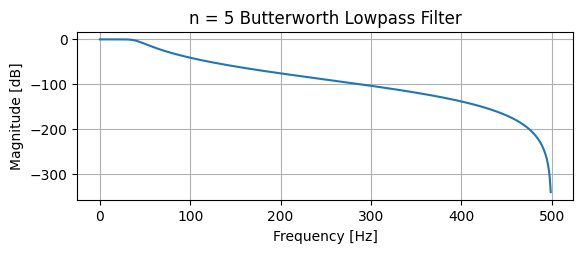

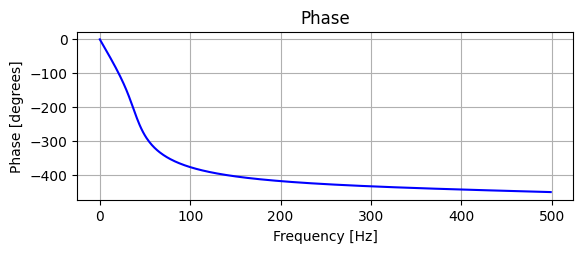

In [3]:
# 绘制频率响应
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('n = %d Butterworth Lowpass Filter' % n)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.show()

# 绘制相位响应
plt.subplot(2, 1, 2)
plt.plot(w, np.degrees(np.unwrap(np.angle(h))), 'b')
plt.title('Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degrees]')
plt.grid()
plt.show()

带通巴特沃斯滤波器

In [7]:
# 定义采样频率和频率规格
fs = 1000  # 采样频率1000 Hz
# Wp = [100, 200] / (fs / 2)  # 通带截止频率归一化到[0, 1]
# Ws = [50, 250] / (fs / 2)  # 阻带截止频率归一化到[0, 1]
Wp = [f / (fs / 2) for f in [100, 200]]  # 通带截止频率归一化到[0, 1]
Ws = [f / (fs / 2) for f in [50, 250]]  # 阻带截止频率归一化到[0, 1]
Rp = 3  # 通带纹波最大值3 dB
Rs = 40  # 阻带衰减最小值40 dB

# 计算滤波器阶数n和截止频率Wn
n, Wn = buttord(Wp, Ws, Rp, Rs)

# 设计Butterworth滤波器
z, p, k = butter(n, Wn, btype='band', analog=False, output='zpk')

# 将零-极-增益(ZPK)格式的传递函数转换为Second-Order Sections (SOS)格式
sos = zpk2sos(z, p, k)

# 计算频率响应
w, h = sosfreqz(sos, worN=128, fs=fs)


<ipython-input-8-f8f63f159f85>:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)))


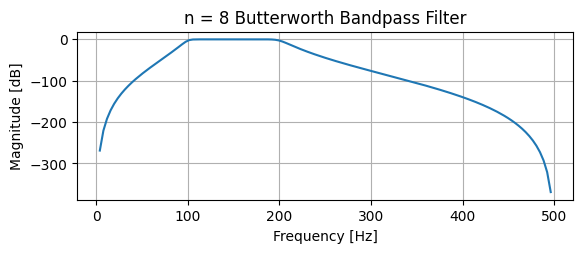

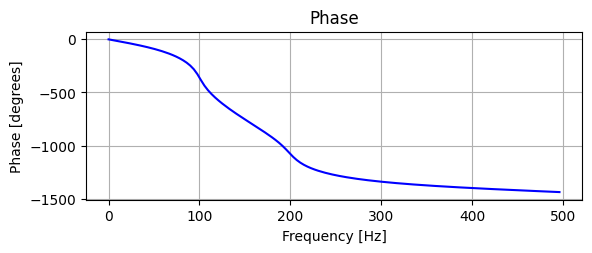

In [8]:
# 绘制频率响应
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('n = %d Butterworth Bandpass Filter' % n)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.show()

# 绘制相位响应
plt.subplot(2, 1, 2)
plt.plot(w, np.degrees(np.unwrap(np.angle(h))), 'b')
plt.title('Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degrees]')
plt.grid()
plt.show()